# Gas Meter Analysis

### Import libraries, read files, and display gas data:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
solar_data = pd.read_csv('solar_data.csv')
census_data = pd.read_csv('census_data.csv')
gas_data = pd.read_csv('gas_meter_data.csv')

In [5]:
print('HEAD', gas_data.head())

HEAD    house_id  gas_meter_id  2020-01-01 00:00:00  2020-01-01 01:00:00  \
0  a90ea0b3      54363558                 0.00                 0.00   
1  049bf03c      54459969                 0.00                 0.00   
2  569aaf4b      40488619                 2.40                 2.64   
3  5edb8c2b      94746136                 0.96                 1.68   
4  0a4bda96      56809534                 0.00                 0.00   

   2020-01-01 02:00:00  2020-01-01 03:00:00  2020-01-01 04:00:00  \
0                 0.00                  0.0                 0.00   
1                 0.00                  0.0                 0.00   
2                 2.40                  2.4                 2.16   
3                 0.72                  0.0                 0.00   
4                 0.00                  0.0                 0.00   

   2020-01-01 05:00:00  2020-01-01 06:00:00  2020-01-01 07:00:00  ...  \
0                  0.0                 0.00                  0.0  ...   
1            

In [6]:
print('INFO', gas_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Columns: 8786 entries, house_id to 2020-12-31 23:00:00
dtypes: float64(8784), int64(1), object(1)
memory usage: 385.2+ MB
INFO None


In [7]:
print('DESC', gas_data.describe())

DESC        gas_meter_id  2020-01-01 00:00:00  2020-01-01 01:00:00  \
count  5.747000e+03          5684.000000          5684.000000   
mean   5.716064e+07             2.419740             2.436228   
std    2.055965e+07             7.283293             7.739692   
min    2.029568e+07             0.000000             0.000000   
25%    4.111716e+07             0.000000             0.000000   
50%    4.976126e+07             0.960000             0.960000   
75%    5.636438e+07             2.880000             2.880000   
max    1.004940e+08           192.000000           216.000000   

       2020-01-01 02:00:00  2020-01-01 03:00:00  2020-01-01 04:00:00  \
count          5684.000000          5684.000000          5684.000000   
mean              2.302020             2.133589             2.083089   
std               7.580132             6.957681             7.098353   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000  

#### some caption whatever

### Pre-processing:

In [16]:
# deal with outliers
Q1 = gas_data.iloc[:, 2:].quantile(0.25)
Q3 = gas_data.iloc[:, 2:].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (gas_data.iloc[:, 2:] < (Q1 - 3 * IQR)) | (gas_data.iloc[:, 2:] > (Q3 + 3 * IQR))
outliers = gas_data[outlier_condition]
outlier_bool = outlier_condition.any(axis = 1)
print(outlier_bool)


0       False
1       False
2        True
3        True
4       False
        ...  
5742     True
5743     True
5744    False
5745     True
5746    False
Length: 5747, dtype: bool


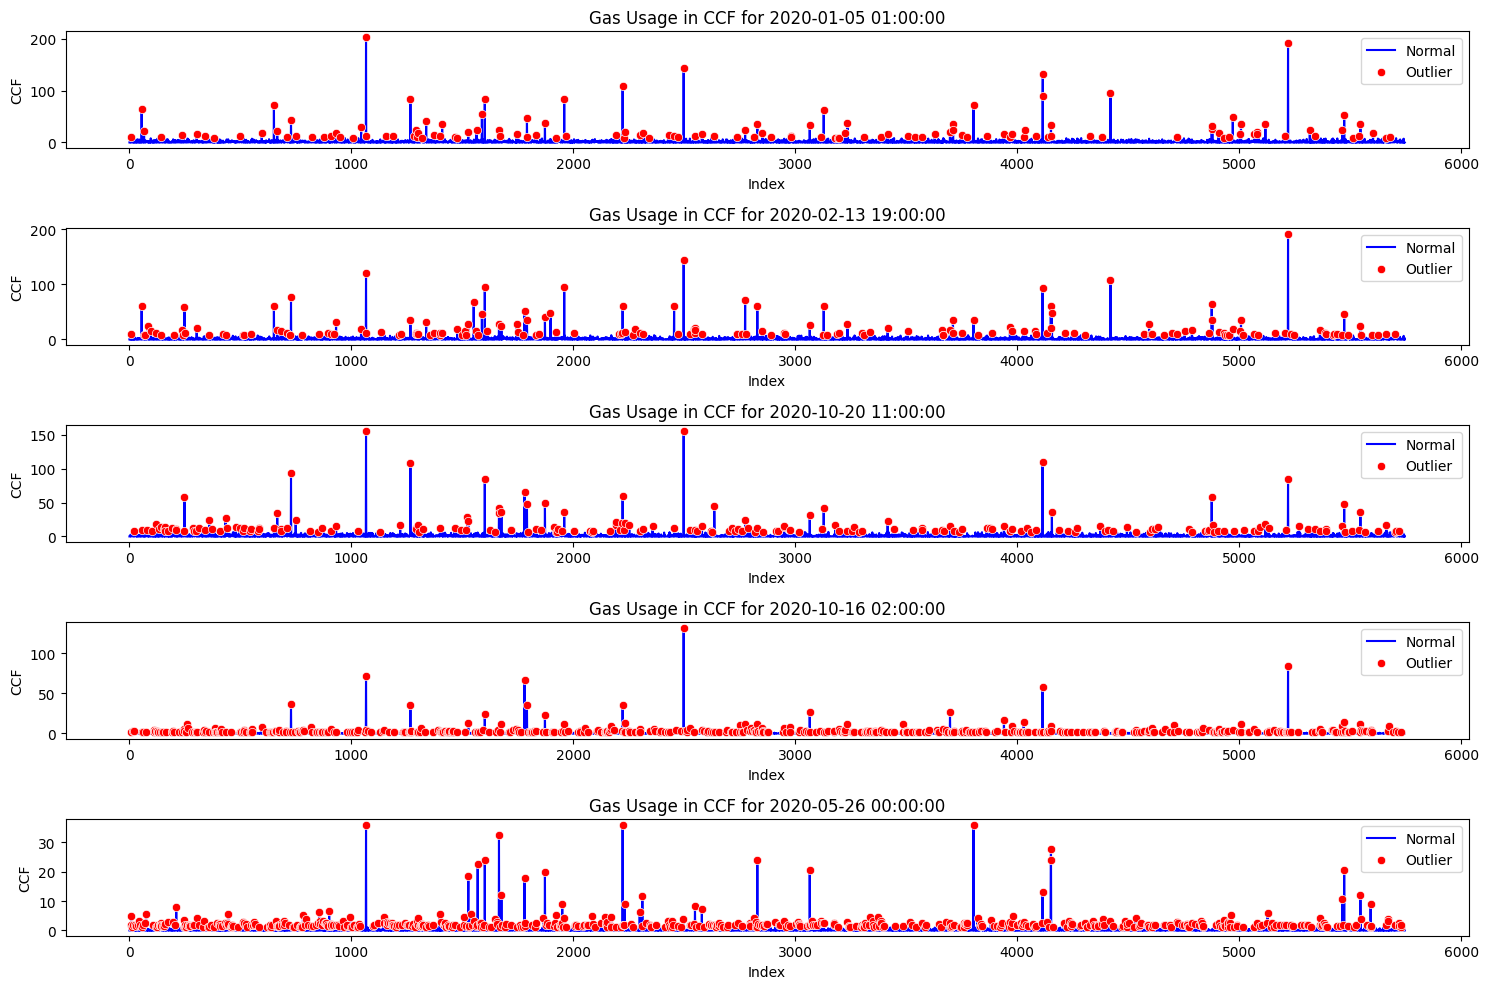

In [17]:
gas_readings = gas_data.select_dtypes(include='float64').columns
sampled_columns = np.random.choice(gas_readings, size=5, replace=False)

# Plotting
plt.figure(figsize=(15, 10))

for i, column in enumerate(sampled_columns, 1):
    plt.subplot(len(sampled_columns), 1, i)
    sns.lineplot(data=gas_data, x=gas_data.index, y=column, color='blue', label='Normal')
    sns.scatterplot(data=gas_data[outlier_condition[column]], x=gas_data[outlier_condition[column]].index, y=column, color='red', label='Outlier', zorder=5)
    plt.title(f'Gas Usage in CCF for {column}')
    plt.xlabel('Index')
    plt.ylabel('CCF')
    plt.legend()

plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import math

# more complex approach
"""
Detects outliers using seasonal decomposition and z-score. 
args: 
    ts (pd.Series): time series data for single house
    window (int): seasonal window length
    sigma(float): z-score critical value to identify outliers
returns:
    pd:Series: boolean series, True if outlier present"""
def detect_outliers(ts, window, sigma = 3):
    decomposed = seasonal_decompose(ts, model ='additive', period = window)

    ts_resid = decomposed.resid.dropna()
    z_scores = (ts_resid - ts_resid.mean()) / ts_resid.std()

    return z_scores.abs() > sigma

window = 7 * 24 # one week
outlier_ids = []

# for house_id in gas_data['house_id'].unique():
#     house_data = 

In [ ]:
# find out if gas meter id attribute is not null in solar_data. if not, note down house id. these house ids are using gas

gas_house_ids = []


for solar_row in range(len(solar_data.index)):
       if math.isnan(solar_data['gas_meter_id'].loc[solar_row]):
               continue
       else:
            gas_house_ids.append(solar_data['house_id'].loc[solar_row])  


print(gas_house_ids)

# care about these houses - from these, select good candidates for solar
# next: aggregate gas meter readings to use when comparing with what solar can generate, to see if switching to solar is good idea

### Time Series:

In [13]:
gas_readings = gas_data.select_dtypes(include='float64').columns
gas_data['total_gas_usage'] = gas_data[gas_readings].sum(axis = 1)
print(gas_data[['house_id', 'total_gas_usage']])

      house_id  total_gas_usage
0     a90ea0b3             0.00
1     049bf03c             0.00
2     569aaf4b         28503.36
3     5edb8c2b         14926.08
4     0a4bda96             0.00
...        ...              ...
5742  eb13e651         89052.48
5743  6981379f          1514.88
5744  153f86aa             0.00
5745  084d9c81         44491.20
5746  4a9493dc             0.00

[5747 rows x 2 columns]
